# I. Introduction

Nama: Harits Ghiffari Hanif

Pada notebook ini, dilakukan prediksi classification jenis metode kontrasepsi yang digunakan dari beberapa responden Survei Prevalensi Kontrasepsi Nasional Indonesia tahun 1987. Datanya diambil dari https://archive.ics.uci.edu/dataset/30/contraceptive+method+choice. Kemudian, nama kolom-kolom tabelnya di notebook ini saya sesuaikan ulang.

---

# II. Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import joblib
import json

---

# III. Data Loading


Untuk penjelasan setiap kolomnya, bisa melihat tabel berikut.

| Nama Kolom | Deskripsi |
| --- | --- |
| WifeAge | Usia istri |
| WifeEducation | Tingkat edukasi istri (1 $\rightarrow$ Rendah, 2, 3, 4 $\rightarrow$ Tinggi) |
| HusbandEducation | Tingkat edukasi suami (1 $\rightarrow$ Rendah, 2, 3, 4 $\rightarrow$ Tinggi) |
| NumOfChildren | Jumlah anak |
| WifeReligion | Apakah agama istri Islam (0 $\rightarrow$ Non-Islam, 1 $\rightarrow$ Islam) |
| WorkingWife | Apakah istri bekerja (0 $\rightarrow$ Ya, 1 $\rightarrow$ Tidak) |
| HusbandOccupation | Kategori pekerjaan suami (1, 2, 3, 4) |
| StdLivingIndex | Tingkat standard hidup (1 $\rightarrow$ Rendah, 2, 3, 4 $\rightarrow$ Tinggi) |
| MediaExposure | Paparan terhadap media (0 $\rightarrow$ Bagus, 1 $\rightarrow$ Tidak Bagus) |
| ContraceptiveMethodUsed | Jenis metode kontrasepsi yang digunakan (1 $\rightarrow$ Tidak Pakai, 2 $\rightarrow$ Jangka Pendek, 3 $\rightarrow$ Jangka Panjang) |


In [2]:
df = pd.read_csv('cmc.csv', header=None, names=['WifeAge', 'WifeEducation', 'HusbandEducation', 'NumOfChildren',
                                                'WifeReligion', 'WorkingWife', 'HusbandOccupation', 'StdLivingIndex', 
                                                'MediaExposure', 'ContraceptiveMethodUsed'],
                index_col=False)
df

,WifeAge,WifeEducation,HusbandEducation,NumOfChildren,WifeReligion,WorkingWife,HusbandOccupation,StdLivingIndex,MediaExposure,ContraceptiveMethodUsed
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   WifeAge                  1473 non-null   int64
 1   WifeEducation            1473 non-null   int64
 2   HusbandEducation         1473 non-null   int64
 3   NumOfChildren            1473 non-null   int64
 4   WifeReligion             1473 non-null   int64
 5   WorkingWife              1473 non-null   int64
 6   HusbandOccupation        1473 non-null   int64
 7   StdLivingIndex           1473 non-null   int64
 8   MediaExposure            1473 non-null   int64
 9   ContraceptiveMethodUsed  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


---

# IV. Exploratory Data Analysis (EDA)


WifeAge
16     3
17     8
18     7
19    18
20    28
21    48
22    59
23    44
24    61
25    80
26    69
27    59
28    63
29    59
30    64
31    46
32    64
33    55
34    50
35    62
36    57
37    51
38    44
39    34
40    34
41    34
42    40
43    34
44    39
45    41
46    22
47    43
48    30
49    23
Name: count, dtype: int64

WifeEducation
1    152
2    334
3    410
4    577
Name: count, dtype: int64

HusbandEducation
1     44
2    178
3    352
4    899
Name: count, dtype: int64

NumOfChildren
0      97
1     276
2     276
3     259
4     197
5     135
6      92
7      49
8      47
9      16
10     11
11     11
12      4
13      2
16      1
Name: count, dtype: int64

WifeReligion
0     220
1    1253
Name: count, dtype: int64

WorkingWife
0     369
1    1104
Name: count, dtype: int64

HusbandOccupation
1    436
2    425
3    585
4     27
Name: count, dtype: int64

StdLivingIndex
1    129
2    229
3    431
4    684
Name: count, dtype: int64

MediaExposure
0    1364
1     109

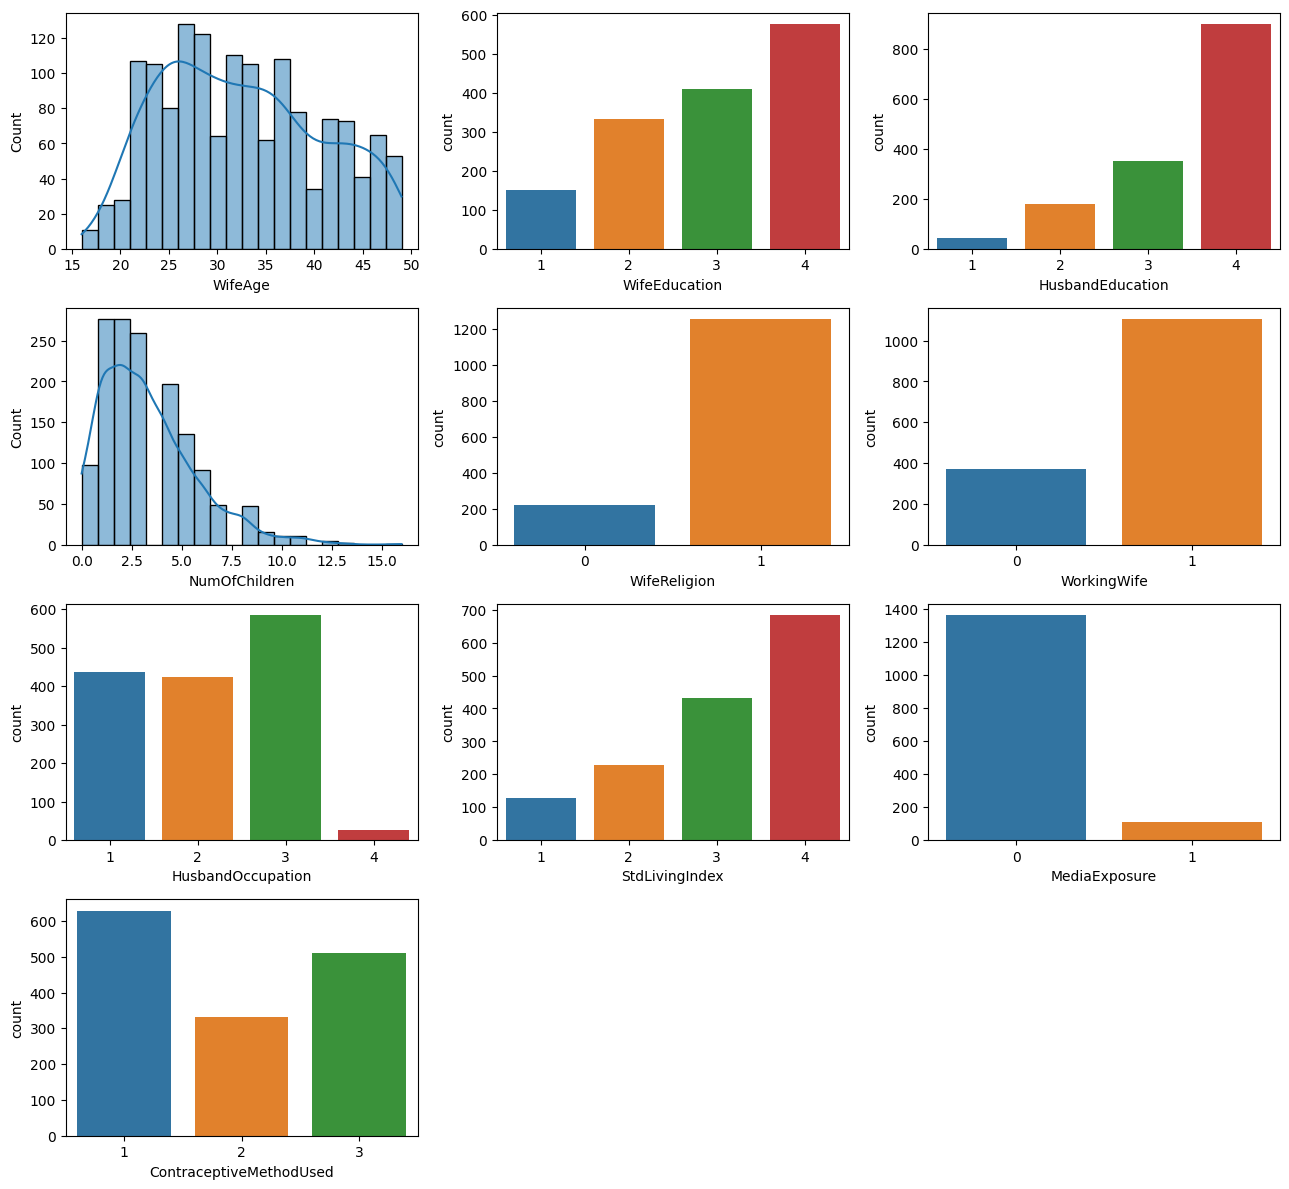

In [4]:
# Cek Kardinalitas
cols = df.columns.tolist()
for i in cols:
    print(df[i].value_counts().sort_index())
    print('')

# Visualisasi
plt.figure(figsize=(13,12))

for i in cols:
    if i not in ['WifeAge', 'NumOfChildren']:
        plt.subplot(4,3, cols.index(i)+1)
        sns.countplot(x=df[i])
    else:
        plt.subplot(4,3, cols.index(i)+1)
        sns.histplot(x=df[i], bins=20, kde=True)

plt.tight_layout()
plt.show()

- Sebagian besar istri dan suami memiliki tingkat pendidikan yang tinggi. 
- Sebagian besar istri beragama Islam dan tidak bekerja. 
- Standard hidup responded sebagian besar tinggi dan memiliki paparan media yang bagus. 
- Sebagian besar tidak menggunakan kontrasepsi, sebagian besar yang lain menggunakan metode kontrasepsi jangka panjang (contohnya Intrauterine Device/IUD), sisanya menggunakan metode kontrasepsi jangka pendek (contohnya pil dan kondom). 

Referensi metode kontrasepsi: 
1. https://www.mycontraception.ie/methods/short-acting-contraception#:~:text=Short%2Dacting%20contraception%20includes%20hormonal,condoms%2C%20spermicides%20and%20the%20diaphragm , 
2. https://dhsprogram.com/pubs/pdf/SR9/SR9.pdf halaman 8.

### Untuk setiap metode kontrasepsi :

Tidak pakai kontrasepsi:

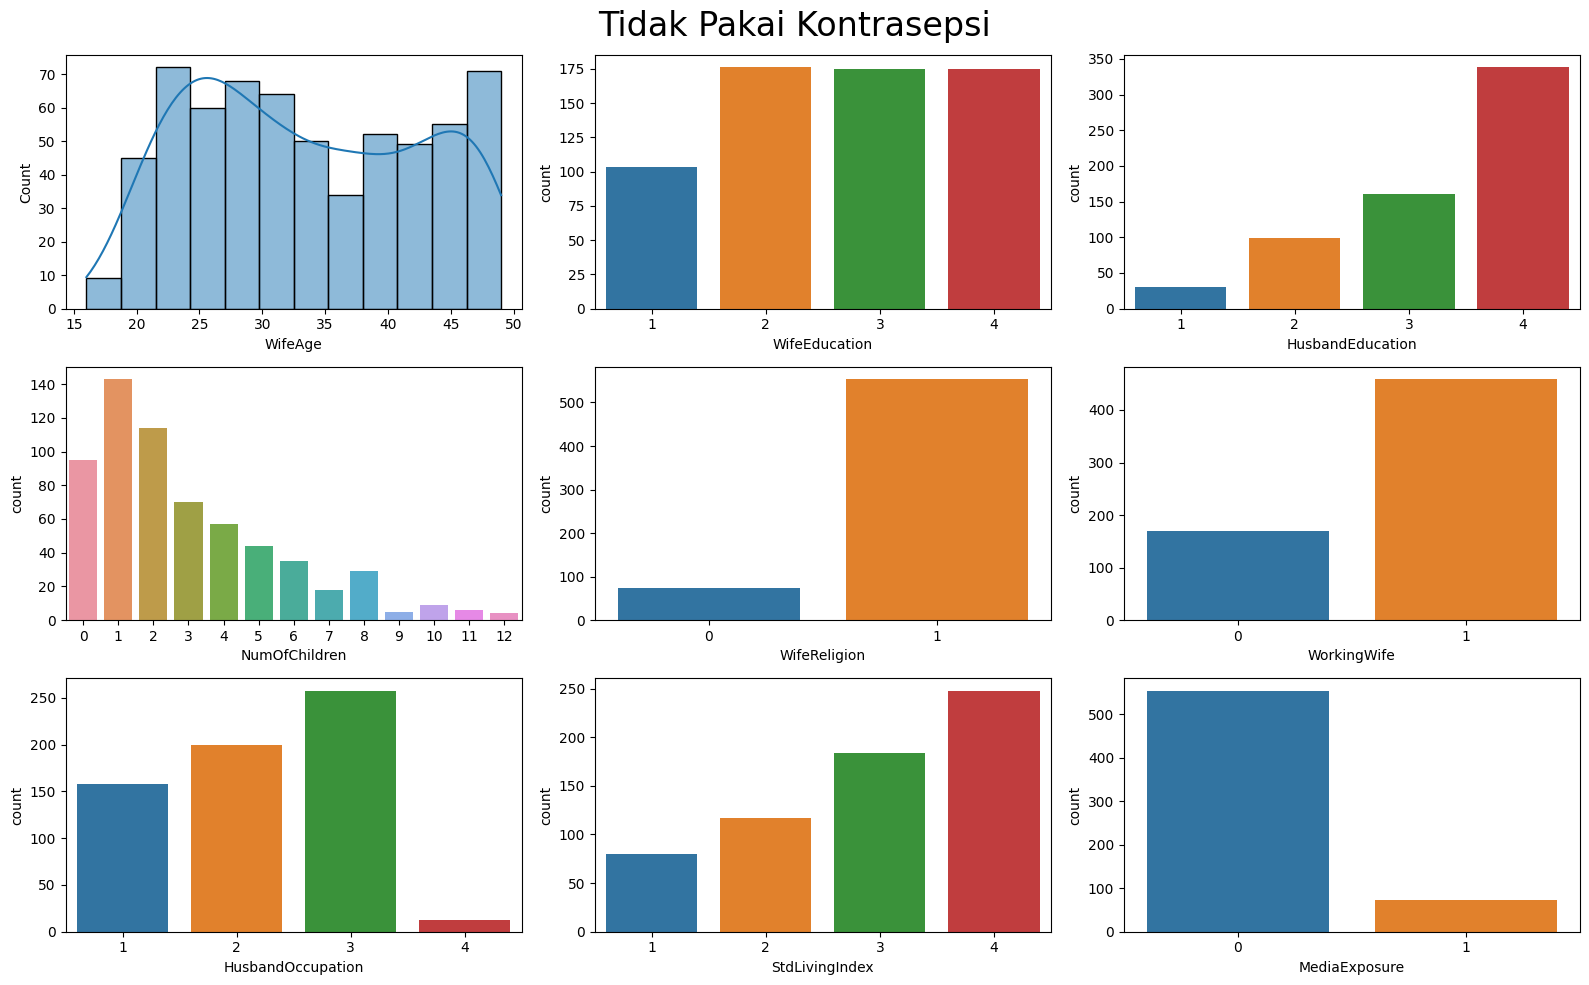

In [5]:
plt.figure(figsize=(16,10))

for i in df.drop(columns=['ContraceptiveMethodUsed']).columns.tolist():
    if i not in ['WifeAge']:
        plt.subplot(3,3, cols.index(i)+1)
        sns.countplot(x=df[i][df['ContraceptiveMethodUsed'] == 1])
    else:
        plt.subplot(3,3, cols.index(i)+1)
        sns.histplot(x=df[i][df['ContraceptiveMethodUsed'] == 1], bins=12, kde=True)

plt.suptitle('Tidak Pakai Kontrasepsi', fontsize=24)
plt.tight_layout()
plt.show()

Kontrasepsi jangka pendek:

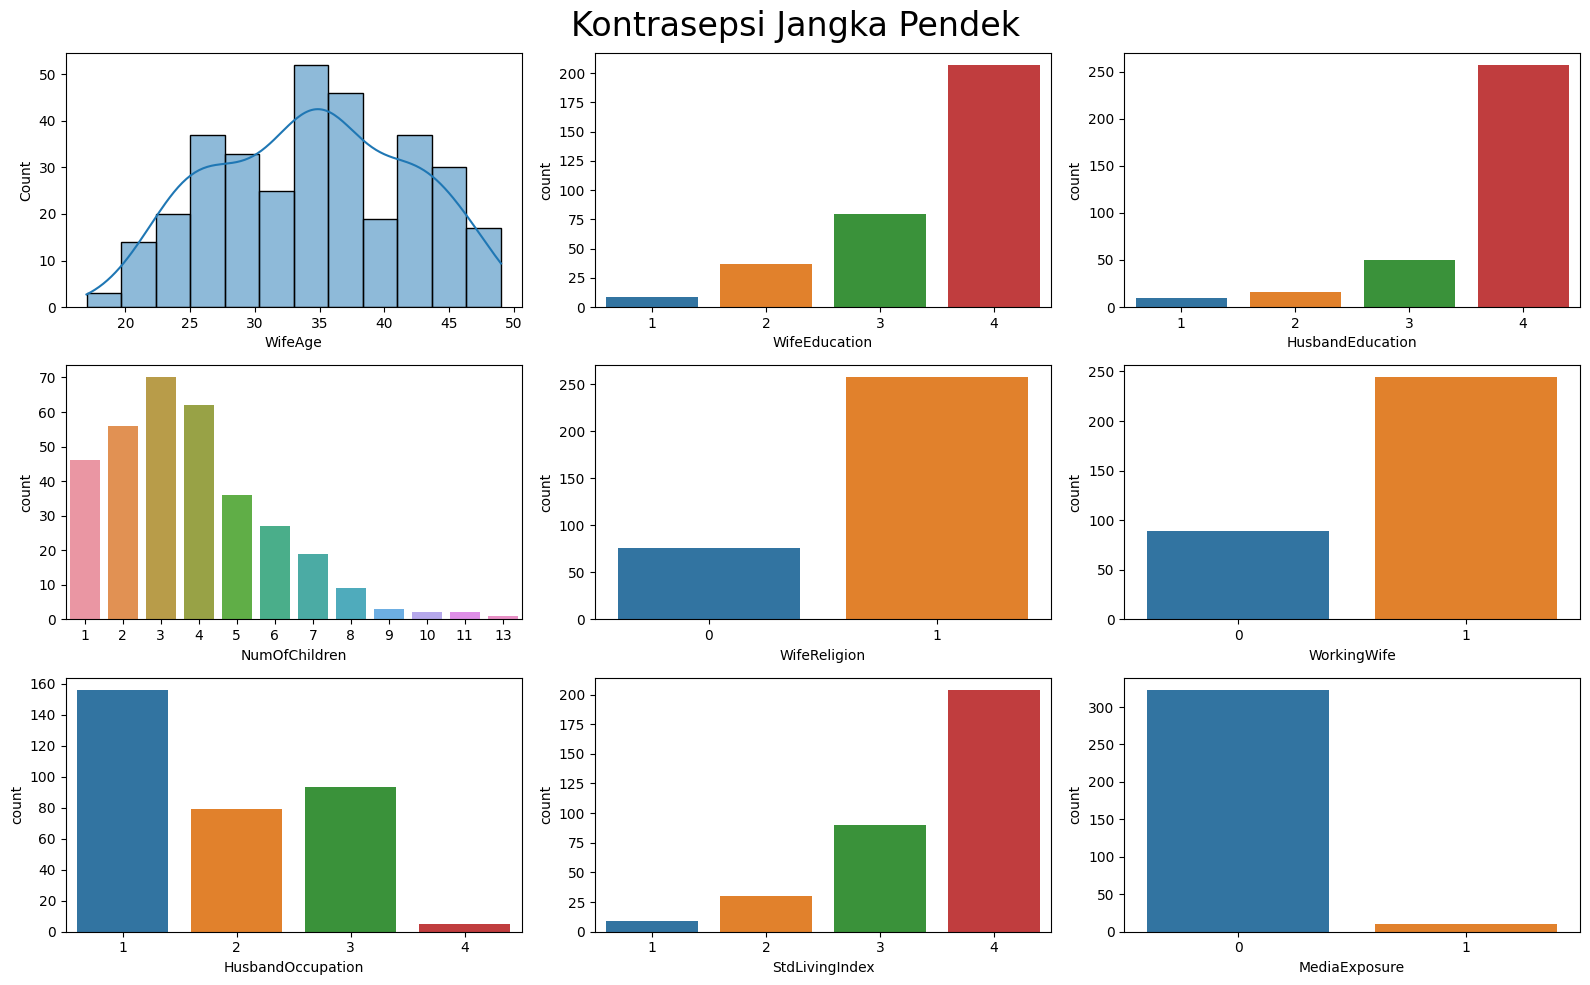

In [6]:
plt.figure(figsize=(16,10))

for i in df.drop(columns=['ContraceptiveMethodUsed']).columns.tolist():
    if i not in ['WifeAge']:
        plt.subplot(3,3, cols.index(i)+1)
        sns.countplot(x=df[i][df['ContraceptiveMethodUsed'] == 2])
    else:
        plt.subplot(3,3, cols.index(i)+1)
        sns.histplot(x=df[i][df['ContraceptiveMethodUsed'] == 2], bins=12, kde=True)

plt.suptitle('Kontrasepsi Jangka Pendek', fontsize=24)
plt.tight_layout()
plt.show()

Kontrasepsi jangka panjang :

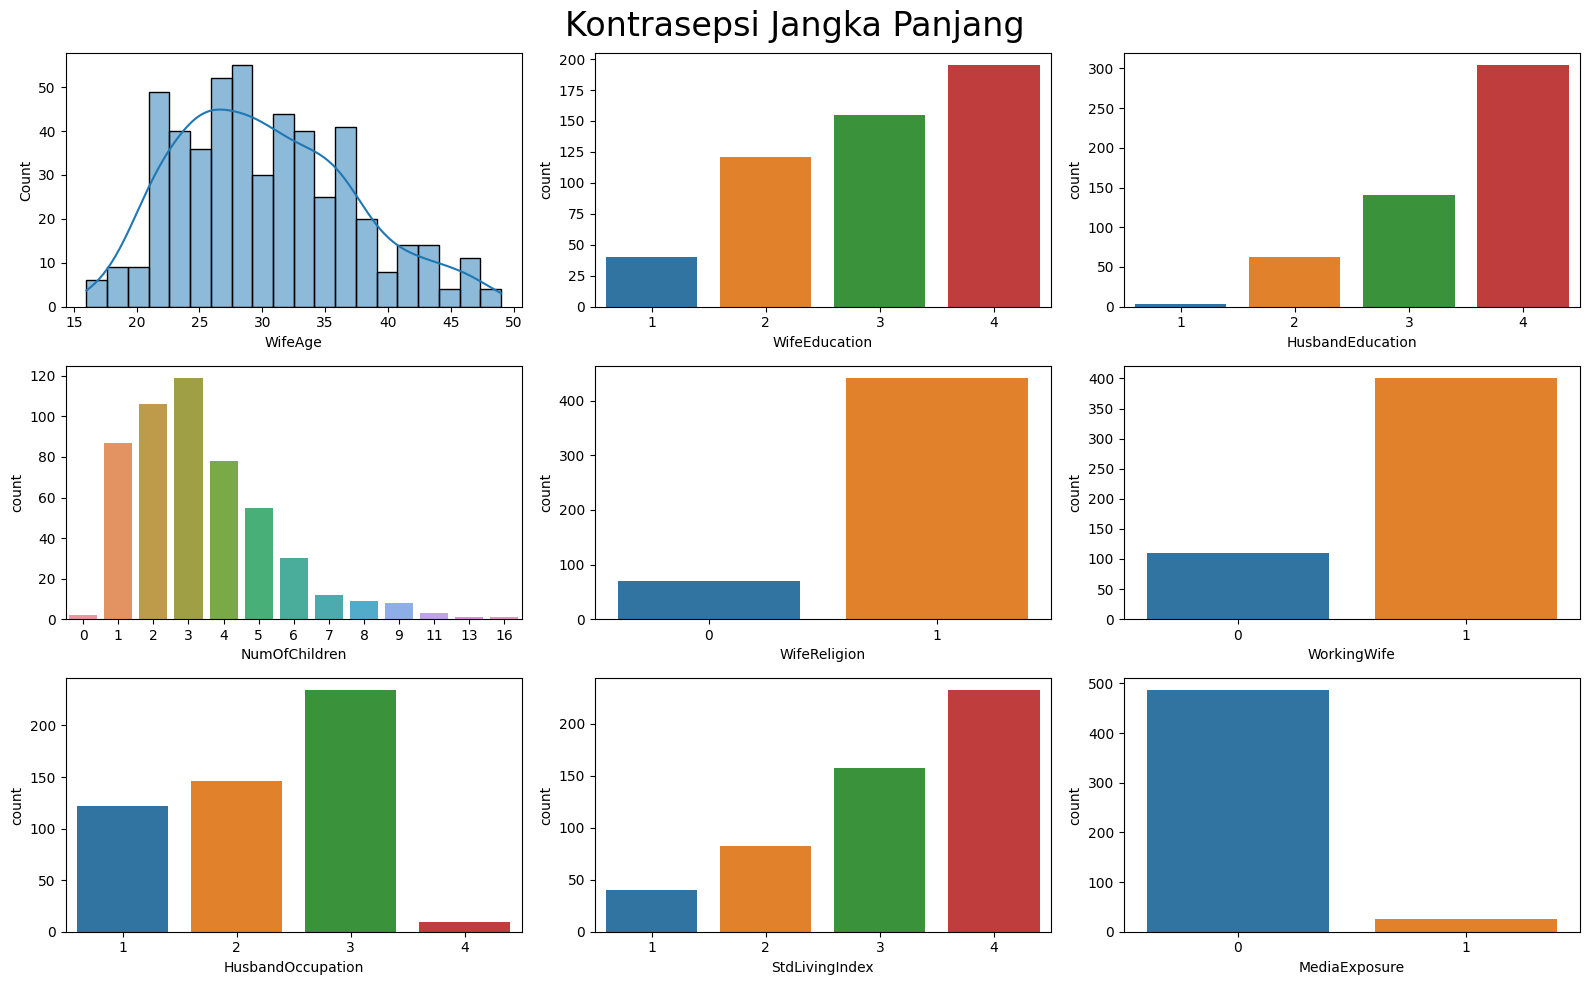

In [7]:
plt.figure(figsize=(16,10))

for i in df.drop(columns=['ContraceptiveMethodUsed']).columns.tolist():
    if i not in ['WifeAge']:
        plt.subplot(3,3, cols.index(i)+1)
        sns.countplot(x=df[i][df['ContraceptiveMethodUsed'] == 3])
    else:
        plt.subplot(3,3, cols.index(i)+1)
        sns.histplot(x=df[i][df['ContraceptiveMethodUsed'] == 3], bins=20, kde=True)

plt.suptitle('Kontrasepsi Jangka Panjang', fontsize=24)
plt.tight_layout()
plt.show()

Yang bisa saya dapatkan:
- Tingkat pendidikan suami dari ketiga kelas mayoritas adalah 4 (tinggi).
- Tingkat pendidikan istri dari kelas 1 merata kecuali tingkat 1. Kemudian untuk kelas lainnya relatif tinggi.
- Dari grafik jumlah anak, tidak terlihat pengaruh metode kontrasepsi yang digunakan terhadap jumlah anak.
- Dari grafik jumlah anak juga, terlihat tren-nya menurun setelah 3, kecuali pada kelas 1, ada peningkatan di 8 jumlah anak. Hal ini mungkin mengindikasikan tingkat kelahiran yang lebih tinggi ketika tidak menggunakan kontrasepsi.
- Dari ketiga kelas, standard hidup mereka bisa dikatakan relatif tinggi. Hal ini mengindikasikan jenis kontrasepsi yang dipilih tidak bergantung pada tingkat standard hidup.

---

# V. Feature Engineering


## Split Dataset

Yang ingin diprediksi adalah jenis metode kontrasepsi yang digunakan. Jadi, targetnya adalah *ContraceptiveMethodUsed* dan fitur-fiturnya adalah sisanya.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['ContraceptiveMethodUsed'], axis=1),
                                                    df['ContraceptiveMethodUsed'],
                                                    test_size=0.25,
                                                    random_state=54)

print('x train size:', x_train.shape)
print('x test size:', x_test.shape)
print('y train size:', y_train.shape)
print('y test size:', y_test.shape)

x train size: (1104, 9)
x test size: (369, 9)
y train size: (1104,)
y test size: (369,)


### Cek Dataset Hasil Split

WifeAge
16     3
17     6
18     7
19    17
20    22
21    35
22    40
23    32
24    43
25    63
26    46
27    45
28    50
29    46
30    48
31    35
32    44
33    40
34    34
35    46
36    45
37    42
38    37
39    26
40    27
41    27
42    27
43    27
44    29
45    29
46    19
47    32
48    17
49    18
Name: count, dtype: int64

WifeEducation
1    111
2    259
3    305
4    429
Name: count, dtype: int64

HusbandEducation
1     29
2    133
3    277
4    665
Name: count, dtype: int64

NumOfChildren
0      78
1     201
2     205
3     195
4     146
5     109
6      60
7      40
8      35
9      13
10      8
11      9
12      3
13      1
16      1
Name: count, dtype: int64

WifeReligion
0    152
1    952
Name: count, dtype: int64

WorkingWife
0    275
1    829
Name: count, dtype: int64

HusbandOccupation
1    328
2    319
3    434
4     23
Name: count, dtype: int64

StdLivingIndex
1    104
2    162
3    327
4    511
Name: count, dtype: int64

MediaExposure
0    1023
1      81
Nam

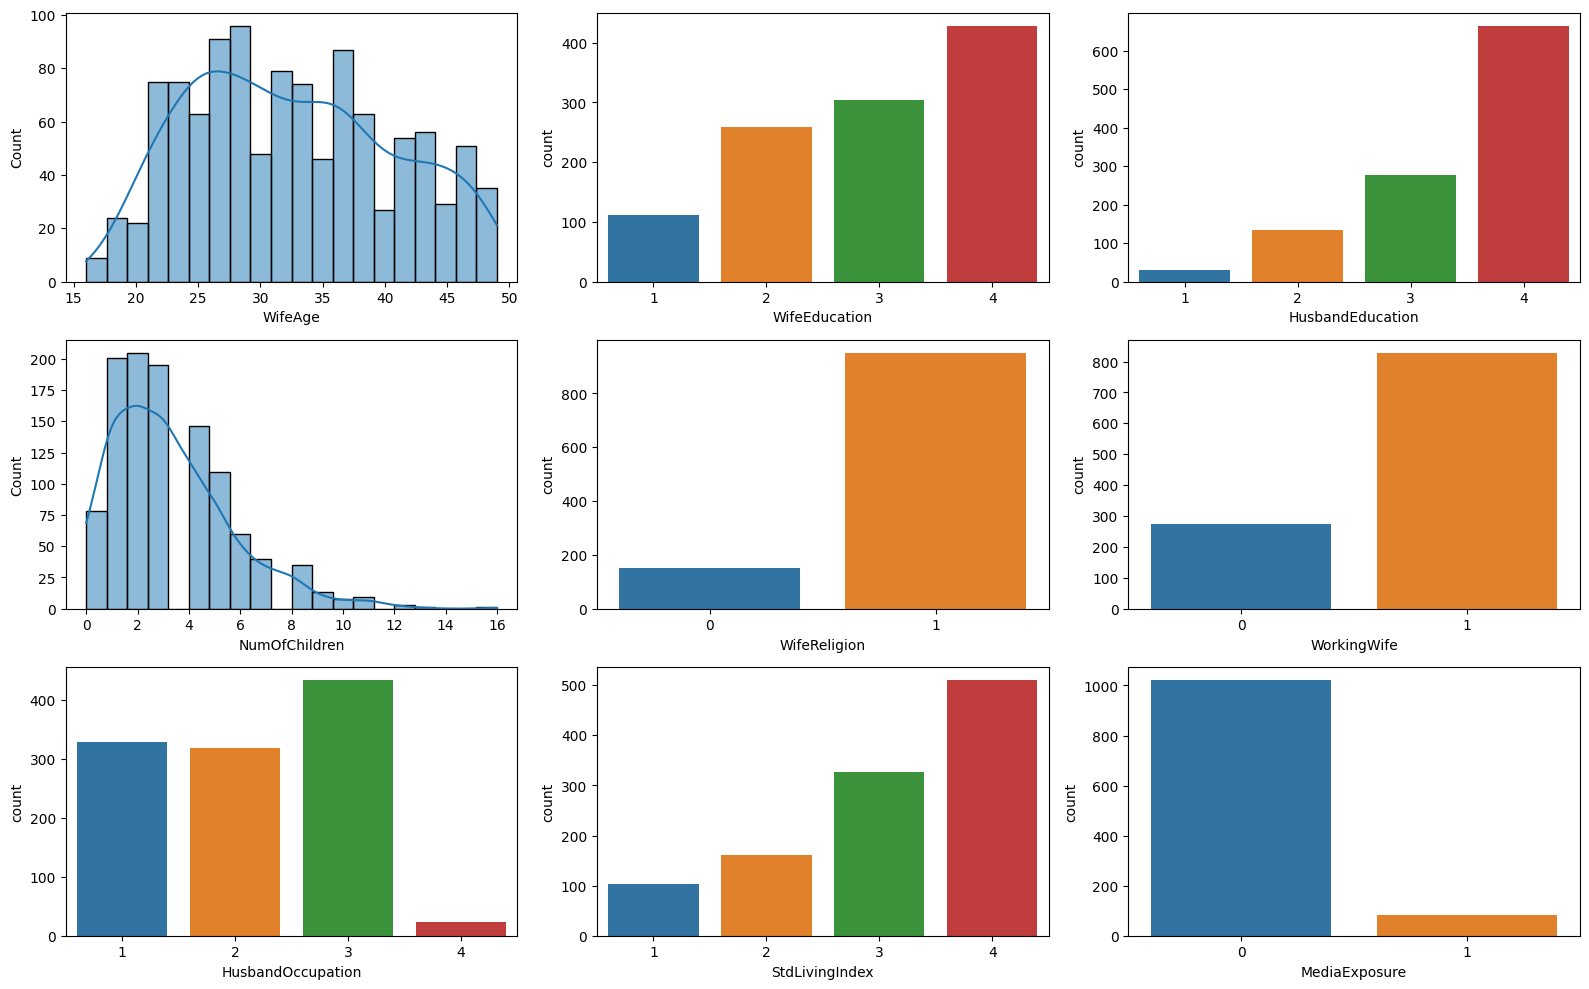

In [9]:
# cek kardinalitas
for i in x_train.columns.tolist():
    print(x_train[i].value_counts().sort_index())
    print('')

# cek distribusi
plt.figure(figsize=(16,10))

for i in x_train.columns.tolist():
    if i not in ['WifeAge', 'NumOfChildren']:
        plt.subplot(3,3, cols.index(i)+1)
        sns.countplot(x=x_train[i])
    else:
        plt.subplot(3,3, cols.index(i)+1)
        sns.histplot(x=x_train[i], bins=20, kde=True)

plt.tight_layout()
plt.show()

In [10]:
# Cek skewness setiap fitur
for i in x_train.columns.tolist():
    print(f'{i} Skewness: {x_train[i].skew()}')

WifeAge Skewness: 0.22763521419848504
WifeEducation Skewness: -0.48928757875987555
HusbandEducation Skewness: -1.2342309574636041
NumOfChildren Skewness: 1.1000338327055676
WifeReligion Skewness: -2.105912959701984
WorkingWife Skewness: -1.1618681614390434
HusbandOccupation Skewness: -0.07884000564089788
StdLivingIndex Skewness: -0.8502285414100068
MediaExposure Skewness: 3.2768855622111874


Untuk variabel numerik, variabel *WifeAge* training berdistribusi normal, sedangkan variabel *NumOfChildren* training tidak.

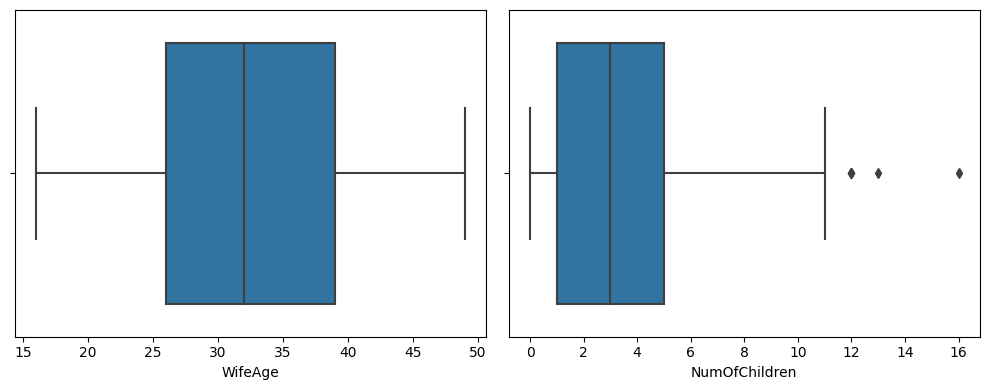

In [11]:
# Cek Outlier dari variabel numerik
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x=x_train['WifeAge'])

plt.subplot(1,2,2)
sns.boxplot(x=x_train['NumOfChildren'])

plt.tight_layout()
plt.show()

Untuk *NumOfChildren*, outliernya akan dihilangkan karena sangat sedikit.

In [12]:
# cari index outlier di x_train
outl_idx = x_train[x_train['NumOfChildren'] > 11].index.tolist()
outl_idx

[1142, 519, 1139, 653, 1013]

In [13]:
x_train.drop(index= outl_idx, inplace=True)
y_train.drop(index= outl_idx, inplace=True)
print('x size:', x_train.shape)
print('y size:', y_train.shape)

x size: (1099, 9)
y size: (1099,)


In [14]:
# cek rasio kelas di y_train
for i in y_train.value_counts().sort_index().index.tolist():
    print(f'Rasio kelas {i}: {len(y_train[y_train == i])/len(y_train):.2f}')

Rasio kelas 1: 0.43
Rasio kelas 2: 0.23
Rasio kelas 3: 0.33


In [15]:
print('Size:', len(y_train))
print(y_train.value_counts().sort_index())

Size: 1099
ContraceptiveMethodUsed
1    478
2    258
3    363
Name: count, dtype: int64


Data pada `y_train` tidak terlalu imbalance. Saya rasa tidak perlu di-oversampling.

## Seleksi Fitur - Cek Korelasi

Analisis korelasi dilakukan dengan menguji korelasi antara target dengan kolom kategorik menggunakan uji Chi-Squared untuk kolom-kolom kategorik.

In [16]:
for i in df.drop(columns=['WifeAge', 'NumOfChildren', 'ContraceptiveMethodUsed']).columns.tolist():
    contingency_table = pd.crosstab(df['ContraceptiveMethodUsed'], df[i])
    res = chi2_contingency(contingency_table)
    print(f"{i}     p-value:", res.pvalue)

WifeEducation     p-value: 8.018770457525528e-28
HusbandEducation     p-value: 6.3045366741788e-14
WifeReligion     p-value: 2.017714533636104e-05
WorkingWife     p-value: 0.07475198652379653
HusbandOccupation     p-value: 3.572619935288063e-12
StdLivingIndex     p-value: 1.6069814612908934e-11
MediaExposure     p-value: 1.393688639141483e-07


Seluruh kolom kategorik kecuali *WorkingWife* memiliki p-value $<$ 0.05. Jadi, $H_0$: tidak ada korelasi antara *ContraceptiveMethodUsed* dengan kolom yang bersangkutan, ditolak. Diterima $H_1$: ada korelasi antara *ContraceptiveMethodUsed* dengan kolom yang bersangkutan. Akan diperiksa nilai korelasi menggunakan metode Kendall.

In [17]:
df.drop(columns=['WifeAge', 'NumOfChildren']).corr(method='kendall')

,WifeEducation,HusbandEducation,WifeReligion,WorkingWife,HusbandOccupation,StdLivingIndex,MediaExposure,ContraceptiveMethodUsed
WifeEducation,1.000000,0.569453,-0.219787,-0.063259,-0.355295,0.320887,-0.281139,0.129779
HusbandEducation,0.569453,1.000000,-0.182266,-0.003849,-0.320844,0.317640,-0.247534,0.076397
WifeReligion,-0.219787,-0.182266,1.000000,0.069837,0.082298,-0.192827,0.060243,-0.027402
WorkingWife,-0.063259,-0.003849,0.069837,1.000000,0.017174,-0.070061,0.001828,0.050819
HusbandOccupation,-0.355295,-0.320844,0.082298,0.017174,1.000000,-0.261172,0.103025,0.012209
StdLivingIndex,0.320887,0.317640,-0.192827,-0.070061,-0.261172,1.000000,-0.217655,0.077068
MediaExposure,-0.281139,-0.247534,0.060243,0.001828,0.103025,-0.217655,1.000000,-0.115307
ContraceptiveMethodUsed,0.129779,0.076397,-0.027402,0.050819,0.012209,0.077068,-0.115307,1.000000


Tidak ada kolom yang memiliki korelasi kuat dengan *ContraceptiveMethodUsed*. Yang paling tinggi hanya *WifeEducation* dan *MediaExposure*. Keduanya saya rasa merupakan faktor pemilihan jenis metode kontrasepsi. Jadi, kolom kategorik yang digunakan sebagai fitur adalah *WifeEducation* dan *MediaExposure*.

Selanjutnya untuk korelasi antara target dengan kolom numerik, akan digunakan ANOVA karena korelasi antara kolom kategorik dan numerik.

In [18]:
for i in ['WifeAge', 'NumOfChildren']:
    grouped_values = []
    for j in df[i].unique():
        grouped_values.append(df['ContraceptiveMethodUsed'][df[i] == j])
    print(f'{i} {f_oneway(*grouped_values)}')

WifeAge F_onewayResult(statistic=3.218155217009487, pvalue=3.28585937292428e-09)
NumOfChildren F_onewayResult(statistic=13.234701129532311, pvalue=6.271318723106153e-30)


Dilihat dari p-value masing-masing kolom, keduanya bernilai $<$ 0.05. Jadi, $H_0$: tidak ada korelasi antara *ContraceptiveMethodUsed* dengan kolom yang bersangkutan, ditolak. Diterima $H_1$: ada korelasi antara *ContraceptiveMethodUsed* dengan kolom yang bersangkutan. Maka, kedua kolom akan dijadikan fitur.

In [19]:
# Seleksi fitur
x_train = x_train[['WifeAge', 'NumOfChildren', 'WifeEducation', 'MediaExposure']]
x_test = x_test[['WifeAge', 'NumOfChildren', 'WifeEducation', 'MediaExposure']]

## Label Encoding

Karena target berupa kategorik, maka digunakan LabelEncoder.

In [20]:
labenc = LabelEncoder()
labenc.fit(y_train)

y_train_encoded = labenc.transform(y_train)
y_test_encoded = labenc.transform(y_test)

## Pembuatan Pipeline

Karena hanya fitur numerik yang digunakan, maka tidak perlu encoding data kategorik. Hanya perlu dilakukan scaling fitur. Kodenya akan dibuat seperti berikut dan mulai digunakan ketika pendefinisian model.

In [21]:
num_pepe = make_pipeline(MinMaxScaler())
cat_pepe = make_pipeline(OrdinalEncoder())

prepro_pepe = ColumnTransformer([
    ('pipe_num', num_pepe, ['WifeAge', 'NumOfChildren']),
    ('pipe_cat', cat_pepe, ['WifeEducation', 'MediaExposure'])
])

---

# VI. Model Definition


Untuk prediksi klasifikasi, digunakan KNN, SVM Classifier, Decision Tree, Random Forest, XGBoost Decision Tree, dan XGBoost Random Forest sebagai *baseline* model. Untuk SVM, akan dibandingkan performa modelnya dari setiap jenis kernel. Dipilih XGBoost untuk boosting karena dapat mengatasi masalah klasifikasi multi-class secara alami [1]. Untuk metric performa yang diperhatikan, dipilih F1 Score dan akurasi, karena saya ingin melihat model mana yang paling akurat, ditambah datanya tidak terlalu imbalance.

[1] https://medium.com/@thedatabeast/adaboost-gradient-boosting-xg-boost-similarities-differences-516874d644c6#:~:text=AdaBoost%20is%20generally%20slower%20than,explicit%20imputation%20of%20missing%20values.

In [22]:
knn_pipe = Pipeline([('prepro', prepro_pepe),
                     ('knn', KNeighborsClassifier())]) 

svmc_linear_pipe = Pipeline([('prepro', prepro_pepe),
                             ('svmc_linear', SVC(kernel='linear'))])

svmc_poly_pipe = Pipeline([('prepro', prepro_pepe),
                           ('svmc_poly', SVC(kernel='poly'))]) 

svmc_rbf_pipe = Pipeline([('prepro', prepro_pepe),
                          ('svmc_rbf', SVC(kernel='rbf'))])

dt_pipe = Pipeline([('prepro', prepro_pepe),
                    ('dt', DecisionTreeClassifier())]) 

rf_pipe = Pipeline([('prepro', prepro_pepe),
                    ('rf', RandomForestClassifier())]) 

dt_xgb_pipe = Pipeline([('prepro', prepro_pepe),
                        ('dt_xgb', xgb.XGBClassifier(tree_method='hist',
                                                   objective='multi:softmax',
                                                   predictor='gpu_predictor',
                                                   device='cuda:0',
                                                   random_state=54))]) 

rf_xgb_pipe = Pipeline([('prepro', prepro_pepe),
                        ('rf_xgb', xgb.XGBRFClassifier(tree_method='hist',
                                                   objective='multi:softmax',
                                                   predictor='gpu_predictor',
                                                   device='cuda:0',
                                                   random_state=54))])

In [23]:
baseline_model = [knn_pipe, svmc_linear_pipe, svmc_poly_pipe, svmc_rbf_pipe, dt_pipe, rf_pipe, dt_xgb_pipe, rf_xgb_pipe]

baseline_model_name = ['KNN', 'SVM Linear', 'SVM Polynomial', 'SVM RBF', 'Decision Tree',
                       'Random Forest', 'XGB Decision Tree', 'XGB Random Forest']

---

# VII. Model Training


## Baseline Model Training

In [24]:
knn_pipe.fit(x_train, y_train_encoded)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['WifeAge', 'NumOfChildren']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['WifeEducation',
                                                   'MediaExposure'])])),
                ('knn', KNeighborsClassifier())])

In [25]:
svmc_linear_pipe.fit(x_train, y_train_encoded)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['WifeAge', 'NumOfChildren']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['WifeEducation',
                                                   'MediaExposure'])])),
                ('svmc_linear', SVC(kernel='linear'))])

In [26]:
svmc_poly_pipe.fit(x_train, y_train_encoded)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['WifeAge', 'NumOfChildren']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['WifeEducation',
                                                   'MediaExposure'])])),
                ('svmc_poly', SVC(kernel='poly'))])

In [27]:
svmc_rbf_pipe.fit(x_train, y_train_encoded)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['WifeAge', 'NumOfChildren']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['WifeEducation',
                                                   'MediaExposure'])])),
                ('svmc_rbf', SVC())])

In [28]:
dt_pipe.fit(x_train, y_train_encoded)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['WifeAge', 'NumOfChildren']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['WifeEducation',
                                                   'MediaExposure'])])),
                ('dt', DecisionTreeClassifier())])

In [29]:
rf_pipe.fit(x_train, y_train_encoded)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['WifeAge', 'NumOfChildren']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['WifeEducation',
                                                   'MediaExposure'])])),
                ('rf', RandomForestClassifier())])

In [30]:
dt_xgb_pipe.fit(x_train, y_train_encoded)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['WifeAge', 'NumOfChildren']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['WifeEducation',
                                                   'MediaExposure'])])),
                ('dt_xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsam...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softmax', ...))])

In [31]:
rf_xgb_pipe.fit(x_train, y_train_encoded)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['WifeAge', 'NumOfChildren']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['WifeEducation',
                                                   'MediaExposure'])])),
                ('rf_xgb',
                 XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, cols...
                                 grow_policy=None, importance_type=None,
                                 interaction_constraints=None, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=None,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 multi_strategy=None, n_estimators=None,
                                 n_jobs=None, num_parallel_tree=None,
                                 objective='multi:softmax',
                                 predictor='gpu_predictor', random_state=54, ...))])

## Hasil Performa Baseline Model

In [32]:
for i in baseline_model:
    f1_train_cross_val = cross_val_score(i, x_train, y_train_encoded, cv=10, scoring='f1_micro')
    print(baseline_model_name[baseline_model.index(i)])
    print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
    print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
    print('')

KNN
F1 Score - Mean - Cross Validation :  0.5077314428690575
F1 Score - Std - Cross Validation  :  0.03461975358452315

SVM Linear
F1 Score - Mean - Cross Validation :  0.5222685571309424
F1 Score - Std - Cross Validation  :  0.041186140968986366

SVM Polynomial
F1 Score - Mean - Cross Validation :  0.5395746455379482
F1 Score - Std - Cross Validation  :  0.02859973715365394

SVM RBF
F1 Score - Mean - Cross Validation :  0.5431943286071726
F1 Score - Std - Cross Validation  :  0.04421358013762365

Decision Tree
F1 Score - Mean - Cross Validation :  0.4659132610508757
F1 Score - Std - Cross Validation  :  0.03831837159054569

Random Forest
F1 Score - Mean - Cross Validation :  0.48683903252710586
F1 Score - Std - Cross Validation  :  0.03752758391625147

XGB Decision Tree
F1 Score - Mean - Cross Validation :  0.5186655546288573
F1 Score - Std - Cross Validation  :  0.03582776143449386

XGB Random Forest
F1 Score - Mean - Cross Validation :  0.56139282735613
F1 Score - Std - Cross Valida

Hasil performa model setelah cross validation menunjukkan XGB Random Forest adalah model yang paling akurat. Maka, selanjutnya akan dilakukan hyperparameter tuning untuk XGB Random Forest.

## Hyperparameter Tuning

Untuk menentukan hyperparameter yang optimal, akan digunakan Random Search untuk `n_estimators`, `max_depth`, `learning_rate`, dan `gamma`, kemudian Grid Search untuk `n_estimators` di sekitar hasil Random Search untuk mempersingkat waktu pencarian.

In [33]:
# setup pilihan parameter untuk random search
random_search_params = {'rf_xgb__n_estimators': [100, 200, 300, 400, 500],
                        'rf_xgb__max_depth': [int(x) for x in np.linspace(10, 100, 5)],
                        'rf_xgb__learning_rate' : [0.1, 0.5, 1],
                        'rf_xgb__gamma' : [0, 1, 10, 100]}
random_search_params

{'rf_xgb__n_estimators': [100, 200, 300, 400, 500],
 'rf_xgb__max_depth': [10, 32, 55, 77, 100],
 'rf_xgb__learning_rate': [0.1, 0.5, 1],
 'rf_xgb__gamma': [0, 1, 10, 100]}

In [34]:
%%time

rf_xgb_randomcv = RandomizedSearchCV(estimator=rf_xgb_pipe,
                                 param_distributions=random_search_params,
                                 cv=5,
                                 random_state=54,
                                 n_jobs=-1,
                                 scoring='f1_micro')
rf_xgb_randomcv.fit(x_train, y_train_encoded)

CPU times: total: 3.72 s
Wall time: 7min 39s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prepro',
                                              ColumnTransformer(transformers=[('pipe_num',
                                                                               Pipeline(steps=[('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               ['WifeAge',
                                                                                'NumOfChildren']),
                                                                              ('pipe_cat',
                                                                               Pipeline(steps=[('ordinalencoder',
                                                                                                OrdinalEncoder())]),
                                                                               ['WifeEducation',
                                                                                'MediaExposure'])])),
                                             ('rf_xgb',
                                              XGBRFClassifier(base_score=None,
                                                              booster=None,
                                                              callback...
                                                              multi_strategy=None,
                                                              n_estimators=None,
                                                              n_jobs=None,
                                                              num_parallel_tree=None,
                                                              objective='multi:softmax',
                                                              predictor='gpu_predictor',
                                                              random_state=54, ...))]),
                   n_jobs=-1,
                   param_distributions={'rf_xgb__gamma': [0, 1, 10, 100],
                                        'rf_xgb__learning_rate': [0.1, 0.5, 1],
                                        'rf_xgb__max_depth': [10, 32, 55, 77,
                                                              100],
                                        'rf_xgb__n_estimators': [100, 200, 300,
                                                                 400, 500]},
                   random_state=54, scoring='f1_micro')

In [35]:
# hasil terbaik dari Random Search
rf_xgb_randomcv.best_params_

{'rf_xgb__n_estimators': 100,
 'rf_xgb__max_depth': 77,
 'rf_xgb__learning_rate': 0.1,
 'rf_xgb__gamma': 1}

In [36]:
# setup pilihan parameter untuk grid search
grid_search_params = {'rf_xgb__n_estimators': [rf_xgb_randomcv.best_params_['rf_xgb__n_estimators'],
                                               rf_xgb_randomcv.best_params_['rf_xgb__n_estimators'] + 100,
                                               rf_xgb_randomcv.best_params_['rf_xgb__n_estimators'] + 200],
                        'rf_xgb__max_depth': [rf_xgb_randomcv.best_params_['rf_xgb__max_depth']],
                        'rf_xgb__learning_rate' : [rf_xgb_randomcv.best_params_['rf_xgb__learning_rate']],
                        'rf_xgb__gamma' : [rf_xgb_randomcv.best_params_['rf_xgb__gamma']]}
grid_search_params

{'rf_xgb__n_estimators': [100, 200, 300],
 'rf_xgb__max_depth': [77],
 'rf_xgb__learning_rate': [0.1],
 'rf_xgb__gamma': [1]}

In [37]:
%%time

rf_xgb_grid = GridSearchCV(rf_xgb_pipe, 
                            param_grid=grid_search_params, 
                            cv=5, 
                            scoring='f1_micro', 
                            n_jobs=-1)
rf_xgb_grid.fit(x_train, y_train_encoded)

CPU times: total: 4.86 s
Wall time: 1min 23s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prepro',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['WifeAge',
                                                                          'NumOfChildren']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['WifeEducation',
                                                                          'MediaExposure'])])),
                                       ('rf_xgb',
                                        XGBRFClassifier(base_score=None,
                                                        booster=None,
                                                        callbacks=None...
                                                        min_child_weight=None,
                                                        missing=nan,
                                                        monotone_constraints=None,
                                                        multi_strategy=None,
                                                        n_estimators=None,
                                                        n_jobs=None,
                                                        num_parallel_tree=None,
                                                        objective='multi:softmax',
                                                        predictor='gpu_predictor',
                                                        random_state=54, ...))]),
             n_jobs=-1,
             param_grid={'rf_xgb__gamma': [1], 'rf_xgb__learning_rate': [0.1],
                         'rf_xgb__max_depth': [77],
                         'rf_xgb__n_estimators': [100, 200, 300]},
             scoring='f1_micro')

In [38]:
# hasil terbaik dari grid search
rf_xgb_grid.best_params_

{'rf_xgb__gamma': 1,
 'rf_xgb__learning_rate': 0.1,
 'rf_xgb__max_depth': 77,
 'rf_xgb__n_estimators': 200}

Jadi, akan digunakan model dengan hyperparameter berikut.

In [39]:
%%time

rf_xgb_tuned_pipe = Pipeline([('prepro', prepro_pepe),
                            ('rf_xgb_tuned', xgb.XGBRFClassifier(tree_method='gpu_hist',
                                                                objective='multi:softmax',
                                                                predictor='gpu_predictor',
                                                                device='cuda:0',
                                                                random_state=54,
                                                                n_estimators=200,
                                                                max_depth=77,
                                                                learning_rate=0.1,
                                                                gamma=1))
])

rf_xgb_tuned_pipe.fit(x_train, y_train_encoded)

CPU times: total: 4.83 s
Wall time: 4.4 s


Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['WifeAge', 'NumOfChildren']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['WifeEducation',
                                                   'MediaExposure'])])),
                ('rf_xgb_tuned',
                 XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=Non...
                                 importance_type=None,
                                 interaction_constraints=None,
                                 learning_rate=0.1, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=77,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 multi_strategy=None, n_estimators=200,
                                 n_jobs=None, num_parallel_tree=None,
                                 objective='multi:softmax',
                                 predictor='gpu_predictor', ...))])

---

# VIII. Model Evaluation


In [40]:
base_pred_train = rf_xgb_pipe.predict(x_train)
tuned_pred_train = rf_xgb_tuned_pipe.predict(x_train)
base_pred_test = rf_xgb_pipe.predict(x_test)
tuned_pred_test = rf_xgb_tuned_pipe.predict(x_test)

print('Baseline Model')
print('Train')
print('Classification Report : \n', classification_report(y_train_encoded, base_pred_train), '\n')
print('Test')
print('Classification Report : \n', classification_report(y_test_encoded, base_pred_test), '\n')

print('Hypertuned Model')
print('Train')
print('Classification Report : \n', classification_report(y_train_encoded, tuned_pred_train), '\n')
print('Test')
print('Classification Report : \n', classification_report(y_test_encoded, tuned_pred_test), '\n')

Baseline Model
Train
Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       478
           1       0.61      0.42      0.50       258
           2       0.53      0.58      0.56       363

    accuracy                           0.62      1099
   macro avg       0.61      0.59      0.59      1099
weighted avg       0.62      0.62      0.61      1099
 

Test
Classification Report : 
               precision    recall  f1-score   support

           0       0.55      0.66      0.60       148
           1       0.45      0.35      0.39        74
           2       0.57      0.52      0.54       147

    accuracy                           0.54       369
   macro avg       0.52      0.51      0.51       369
weighted avg       0.54      0.54      0.54       369
 

Hypertuned Model
Train
Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.77      0.74       47

Akurasi training lebih tinggi daripada testing yang menandakan model overfit. Model yang telah di-tuning memberikan nilai F1-Score yang lebih rendah pada data testing, menandakan model kemungkinan terlalu kompleks. Mungkin algoritma klasifikasi yang lain lebih cocok untuk dataset ini, tetapi waktu yang saya miliki tidak cukup untuk mengujinya satu per satu. Maka, saya akan menggunakan baseline model XGBoosted Random Forest sebagai model yang terbaik.

In [52]:
# buat model untuk disimpan, serta agar tidak bermasalah dengan memindahkan data inference ke GPU
rf_xgb_pipe = Pipeline([('prepro', prepro_pepe),
                        ('rf_xgb', xgb.XGBRFClassifier(tree_method='hist',
                                                   objective='multi:softmax',
                                                   device='cpu',
                                                   random_state=54,
                                                   n_estimators=200,
                                                   max_depth=77,
                                                   learning_rate=0.1,
                                                   gamma=1))])

rf_xgb_pipe.fit(x_train, y_train_encoded)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['WifeAge', 'NumOfChildren']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['WifeEducation',
                                                   'MediaExposure'])])),
                ('rf_xgb',
                 XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, cols...
                                 importance_type=None,
                                 interaction_constraints=None,
                                 learning_rate=0.1, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=77,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 multi_strategy=None, n_estimators=200,
                                 n_jobs=None, num_parallel_tree=None,
                                 objective='multi:softmax', random_state=54, ...))])

---

# IX. Model Saving


In [53]:
with open('model.pkl', 'wb') as file_1:
    joblib.dump(rf_xgb_pipe, file_1)

with open('num_feature.txt', 'w') as file_2:
    json.dump(['WifeAge', 'NumOfChildren'], file_2)

with open('cat_feature.txt', 'w') as file_3:
    json.dump(['WifeEducation', 'MediaExposure'], file_3)

with open('labenc.pkl', 'wb') as file_4:
    joblib.dump(labenc, file_4)

---

# X. Model Inference


File loading :

In [54]:
with open('model.pkl', 'rb') as file_1:
    model_infer = joblib.load(file_1)

with open('num_feature.txt', 'r') as file_2:
    num_feat_infer = json.load(file_2)

with open('cat_feature.txt', 'r') as file_3:
    cat_feat_infer = json.load(file_3)

with open('labenc.pkl', 'rb') as file_4:
    labenc_infer = joblib.load(file_4)

Data to infer :

In [55]:
data_infer = pd.DataFrame({'WifeAge':[32,27,29], 
                            'WifeEducation':[4,3,3], 
                            'HusbandEducation':[4,3,4], 
                            'NumOfChildren':[2,0,1],
                            'WifeReligion':[1,0,0], 
                            'WorkingWife':[1,0,0], 
                            'HusbandOccupation':[4,2,1], 
                            'StdLivingIndex':[4,2,3],
                            'MediaExposure':[0,1,0], 
                            'ContraceptiveMethodUsed':[1,2,3]
})

In [56]:
# Setup Feature
feature_infer = num_feat_infer + cat_feat_infer

Label Encoding

In [57]:
y_infer_encoded = labenc_infer.transform(data_infer['ContraceptiveMethodUsed'])

Predicting

In [58]:
y_pred_infer = model_infer.predict(data_infer[feature_infer])

In [59]:
y_pred_infer_decoded = []
for i in y_pred_infer:
    if i == 0:
        y_pred_infer_decoded.append(1)
    elif i == 1:
        y_pred_infer_decoded.append(2)
    else:
        y_pred_infer_decoded.append(3)

y_pred_infer_decoded

[3, 1, 1]

In [60]:
pd.DataFrame({'Actual': data_infer['ContraceptiveMethodUsed'],
              'Predicted':y_pred_infer_decoded})

,Actual,Predicted
0,1,3
1,2,1
2,3,1


---

# XI. Kesimpulan

Telah dibuat model untuk memprediksi kelas seorang istri dalam memilih metode kontrasepsi. Model yang telah dibuat tidak akurat dalam prediksinya, hanya sekitar 50% - 60% akurasi. Lebih baik model ini tidak digunakan dalam memprediksi metode kontrasepsi seorang istri. Untuk ke depannya, coba model klasifikasi lain yang lebih cocok dengan hyperparameter yang optimal sehingga bisa memprediksi metode kontrasepsinya secara akurat.

---

# XII. Conceptual Problems

### 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging adalah singkatan dari Bootstraping dan Aggregating.

Cara kerja bagging. Pertama, beberapa model dilatih secara independen pada subset dari dataset training. Kemudian, hasil prediksi beberapa model tersebut digabungkan. Bisa melihat rata-rata jika regresi atau modus jika klasifikasi.

### 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Karena algoritma boosting yang saya pilih juga Random Forest dengan XGBoost, maka bedanya hanya pada bagian boosting saja.

Cara kerja Random Forest: membuat sekian decision tree untuk sekian subset data training; kemudian melatih setiap decision tree pada masing-masing subset data training yang sudah ditentukan; kemudian hasil prediksi dari masing-masing decision tree digabungkan, biasanya dalam bentuk rata-rata atau modus.

XGBoost didasari oleh Gradient Boosting (algoritma yang menambahkan *weak model* baru setelah setiap iterasi dengan mempelajari error-nya sehingga menjadi model yang lebih akurat) yang telah dioptimisasi.

### 3. Jelaskan apa yang dimaksud dengan Cross Validation !

Teknik untuk memperkirakan performa model pada data yang belum dia lihat. Suatu model akan dilatih pada beberapa susunan sub-dataset yang berbeda dari suatu dataset. Rata-rata akurasi prediksi model tersebut dari beberapa susunan subset yang berbeda menjadi acuan estimasi performa model.